In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import string
import scipy.constants

#own modules
from evaluation.utils import db, tools
from evaluation.processing import tools_ec
from evaluation.visualization import plot

# specific functions for study
general_funcs = tools.import_from_path('general_funcs', r'../general_funcs.py')

'done'

'done'

# Data

In [2]:
exp_ec, data_ec, exp_icpms, data_icpms, data_stability \
        = db.get_exp_sfc_icpms(sql_ec='''SELECT *
                                         FROM exp_ec_expanded
                                         WHERE name_user = "n.roettcher"
                                             AND DATE(t_start__timestamp) IN ("2024-03-26",
                                                                              "2024-04-03" #, 
                                                                              #"2024-04-04"  top
                                                                              )
                                             AND comment = 'act+SGEIS'
                                             AND name_setup_sfc_alias = "Sandwitch"
                                             #AND id_sample = 179 # equals loading__mg_Ir_cm2 > 1.6 but loading is added later
                                             # AND id_ML_technique NOT IN (2, 3, 4) # activation techniques
                                             ;''',
                               add_data_stability_analysis=True,  
                               add_gravimetric=True,
                               get_data_icpms_t_end_shift__s=500,
                              )
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 2, 'icpms_location'] = 'top'
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 3, 'icpms_location'] = 'bottom'




Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 114 
SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2, fc_top_name_flow_cell_A_opening_ideal__mm2, fc_top_name_flow_cell_A_opening_real__mm2, fc_top_id_sealing_A_opening__mm2, fc_top_id_PTL_A_PTL__mm2, fc_bottom_name_flow_cell_A_opening_ideal__mm2, fc_bottom_name_flow_cell_A_opening_real__mm2, fc_bottom_id_sealing_A_opening__mm2, fc_bottom_id_PTL_A_PTL__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (12858, 12859, 12860, 12861, 12862, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12870, 12871, 12872, 12873, 12874, 12875, 12876, 12938, 12939, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 12947, 12948, 12949, 12950, 12951, 12952, 12953, 12954, 12955, 12956, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 

/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/processing/tools_ec.py:964: UserWarning: Column: "j__mA_cm2geo_active_chosen" not available in data_ec. Will be skipped.
  warnings.warn(f'Column: "{col}" not available in data_ec. Will be skipped.')


# sfig:dis_pro_top_all_loadings_Ir_Ti

SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (12858, 12859, 12860, 12861, 12862, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12870, 12871, 12872, 12873, 12874, 12875, 12876, 12938, 12939, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 12947, 12948, 12949, 12950, 12951, 12952, 12953, 12954, 12955, 12956, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 13051, 13052, 13053, 13149, 13150, 13151, 13152, 13153, 13154, 13155, 13156, 13157, 13158, 13159, 13160, 13161, 13162, 13163, 13164, 13165, 13166, 13167, 13208, 13209, 13210, 13211, 13212, 13213, 13214, 13215, 13216, 13217, 13218, 13219, 13220, 13221, 13222, 13223, 13224, 13225, 13226, 13281, 13282, 13283, 13284, 13285, 13286, 13287, 13288, 13289, 13290, 13291, 13292, 13293, 13294, 13295, 13296, 13297, 13298, 13299);
Added snychronized timestamp column:  T

,icpms_location,id_spot,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,id_ML,id_ML_technique,force__N,linaxis_x__mm,linaxis_y__mm,linaxis_z__mm,T_stage__degC,interrupted,labview_sfc_version,db_version,comment,ec_name_technique,ec_R_u__ohm,ec_iR_corr_in_situ__percent,ec_R_u_postdetermined__ohm,ec_R_u_determining_exp_ec,ec_R_u_determining_updated,ec_E_RE__VvsRHE,ec_name_RE,ec_name_RE_material,ec_name_RE_manufacturer,ec_name_RE_model,ec_name_CE,ec_name_CE_material,ec_name_CE_manufacturer,ec_name_CE_model,ec_name_CE_comment,ec_name_device,ec_id_control_mode,ec_id_ie_range,ec_id_vch_range,ec_id_ich_range,ec_id_vch_filter,ec_id_ich_filter,ec_id_ca_speed,ec_id_ie_stability,ec_id_sampling_mode,ec_ie_range_auto,ec_vch_range_auto,ec_ich_range_auto,samples_id_sample,samples_name_sample,samples_name_user,samples_t_manufactured__timestamp,samples_comment,samples_total_loading__mg_cm2,spots_id_spot,spots_spot_size__mm2,spots_pos_x__mm,spots_pos_y__mm,spots_comment,spots_total_loading__mg_cm2,spots_m_CL__mg,spots_m_Decal_plus_CL__mg,spots_m_Decal__mg,cv_name_technique,cv_E_initial__VvsRE,cv_E_apex1__VvsRE,cv_E_apex2__VvsRE,cv_E_final__VvsRE,cv_scanrate__mV_s,cv_stepsize__mV,cv_cycles,cv_E_initial__VvsOCP,cv_E_apex1__VvsOCP,cv_E_apex2__VvsOCP,cv_E_final__VvsOCP,geis_name_technique,geis_f_initial__Hz,geis_f_final__Hz,geis_I_dc__A,geis_I_amplitude__A,geis_R_initialguess__ohm,geis_points_per_decade,ghold_name_technique,ghold_I_hold__A,ghold_t_hold__s,ghold_t_samplerate__s,gpulse_name_technique,gpulse_I_hold1__A,gpulse_I_hold2__A,gpulse_t_hold1__s,gpulse_t_hold2__s,gpulse_t_samplerate__s,gpulse_cycles,ocp_name_technique,ocp_t_hold__s,ocp_t_samplerate__s,peis_name_technique,peis_f_initial__Hz,peis_f_final__Hz,peis_E_dc__VvsRE,peis_E_amplitude__VvsRE,peis_R_initialguess__ohm,peis_points_per_decade,peis_E_dc__VvsOCP,phold_name_technique,phold_E_hold__VvsRE,phold_t_hold__s,phold_t_samplerate__s,phold_E_hold__VvsOCP,ppulse_name_technique,ppulse_E_hold1__VvsRE,ppulse_E_hold2__VvsRE,ppulse_t_hold1__s,ppulse_t_hold2__s,ppulse_t_samplerate__s,ppulse_cycles,ppulse_E_hold1__VvsOCP,ppulse_E_hold2__VvsOCP,ramp_name_technique,ramp_E_initial__VvsRE,ramp_E_final__VvsRE,ramp_scanrate__mV_s,ramp_stepsize__mV,ramp_cycles,ramp_E_initial__VvsOCP,ramp_E_final__VvsOCP,fc_top_name_flow_cell,fc_top_name_flow_cell_name_user,fc_top_name_flow_cell_material,fc_top_name_flow_cell_A_opening_ideal__mm2,fc_top_name_flow_cell_A_opening_real__mm2,fc_top_name_flow_cell_manufacture_date,fc_top_name_flow_cell_CAD_file,fc_top_name_flow_cell_opening_shape,fc_top_name_flow_cell_comment,fc_top_id_sealing,fc_top_id_sealing_name_user,fc_top_id_sealing_material,fc_top_id_sealing_A_sealing__mm2,fc_top_id_sealing_A_opening__mm2,fc_top_id_sealing_thickness__mm,fc_top_id_sealing_shaping_method,fc_top_id_sealing_comment,fc_top_id_PTL,fc_top_id_PTL_name_user,fc_top_id_PTL_material,fc_top_id_PTL_thickness__mm,fc_top_id_PTL_manufacturer,fc_top_id_PTL_A_PTL__mm2,fc_top_id_PTL_shaping_method,fc_top_id_PTL_comment,fc_bottom_name_flow_cell,fc_bottom_name_flow_cell_name_user,fc_bottom_name_flow_cell_material,fc_bottom_name_flow_cell_A_opening_ideal__mm2,fc_bottom_name_flow_cell_A_opening_real__mm2,fc_bottom_name_flow_cell_manufacture_date,fc_bottom_name_flow_cell_CAD_file,fc_bottom_name_flow_cell_opening_shape,fc_bottom_name_flow_cell_comment,fc_bottom_id_sealing,fc_bottom_id_sealing_name_user,fc_bottom_id_sealing_material,fc_bottom_id_sealing_A_sealing__mm2,fc_bottom_id_sealing_A_opening__mm2,fc_bottom_id_sealing_thickness__mm,fc_bottom_id_sealing_shaping_method,fc_bottom_id_sealing_comment,fc_bottom_id_PTL,fc_bottom_id_PTL_name_user,fc_bottom_id_PTL_material,fc_bottom_id_PTL_thickness__mm,fc_bottom_id_PTL_manufacturer,fc_bottom_id_PTL_A_PTL__mm2,fc_bottom_id_PTL_shaping_method,fc_bottom_id_PTL_comment,fe_top_id_pump_in,fe_top_id_pump_in_manufacturer,fe_top_id_pump_in_model,fe_top_id_p

Different number of datapoints averaged, check avg_counts column in data dataframe.
   Number of experiments averaged: [2 1]
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


Different number of datapoints averaged, check avg_counts column in data dataframe.
   Number of experiments averaged: [2 1]
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


,,name_isotope_analyte,name_isotope_internalstandard,id_spot,id_exp_icpms,name_sample,name_user,name_setup_icpms,t_start__timestamp_icpms_pc,t_duration__s,t_duration_planned__s,type_experiment,plasma_mode,tune_mode,num_of_scans,id_exp_icpms_calibration_set,gas_dilution_factor,name_gas_collision,flow_rate_collision__mL_min,name_gas_reaction,flow_rate_reaction__mL_min,comment,name_computer_inserted_data,file_path_rawdata,t_inserted_data__timestamp,file_name_rawdata,batch_name,t_start_delaycorrected__timestamp_sfc_pc,t_end_delaycorrected__timestamp_sfc_pc,name_setup_sfc,t_start__timestamp_sfc_pc,t_delay__s,flow_rate_real__mul_min,t_start_shift__s,t_end_shift__s,calibration_slope__countratio_mug_L,delta_calibration_slope__countratio_mug_L,calibration_intercept__countratio,delta_calibration_intercept__countratio,Rsquared,calibration_method,file_path_calibration_plot,name_computer_inserted_calibration_data,t_inserted_calibration_data__timestamp,analyte_element,analyte_atomic_number,internalstandard_element,internalstandard_atomic_number,loading__mg_Ir_cm2,avg_counts,m_dissolved_trapz__ng_round_significant
id_sample,icpms_location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
179,top,"['Ir193', 'Ti47']","['Re187', 'Sc45']","[7, 8]",709,sfc,n.roettcher,hte_1,2024-03-26 10:54:55,35268.600000,49999.800000,sfc-icpms,GeneralPurpose,No Gas,57628,118,0.000000,None,None,None,None,sfc-icpms,DESKTOP-CAN2PJU,D:\Agilent\ICPMH\1\DATA\n.roettcher\20240326_IrTi_02HClO4_025rps.b\sfc.d\sfc.csv,2024-03-26 20:56:52,sfc.csv,20240326_IrTi_02HClO4_025rps.b,2024-03-26 10:53:00,2024-03-26 20:40:48.593750,SFC_1,2024-03-26 10:53:13,13.000000,763.710000,0.000000,0.000000,"[13.7557, 0.389281]",0.118015,"[-0.161929, 0.0258554]",0.593019,"[0.999965, 0.999998]",scipy.optimize.curve_fit,"['/home/hte_admin/sciebo/jupyter/shared/03_processing_reports/01_icpms_calibration_reports/118_Ir193_Re187.pdf', '/home/hte_admin/sciebo/jupyter/shared/03_processing_reports/01_icpms_calibration_reports/118_Ti47_Sc45.pdf']",IEK11404,"[Timestamp('2024-04-04 15:10:07'), Timestamp('2024-04-04 15:10:10')]","['Ir', 'Ti']","[77, 22]","['Re', 'Sc']","[75, 21]",1.654533,"[array([2, 1]), array([2, 1])]","['$2 \\pm 5$', '$3 \\pm 5$']"
180,top,"['Ir193', 'Ti47']","['Re187', 'Sc45']","[3, 4]","[709, 724]",sfc,n.roettcher,hte_1,"[Timestamp('2024-03-26 10:54:55'), Timestamp('2024-04-03 11:11:20')]","[35268.6, 27705.4]","[49999.8, 49998.0]",sfc-icpms,GeneralPurpose,No Gas,"[57628, 45270]","[118, 120]",0.000000,None,None,None,None,sfc-icpms,DESKTOP-CAN2PJU,"['D:\\Agilent\\ICPMH\\1\\DATA\\n.roettcher\\20240326_IrTi_02HClO4_025rps.b\\sfc.d\\sfc.csv', 'D:\\Agilent\\ICPMH\\1\\DATA\\n.roettcher\\20240403_IrTi_02HClO4_025rps_#3.b\\sfc.d\\sfc.csv']","[Timestamp('2024-03-26 20:56:52'), Timestamp('2024-04-03 19:17:09')]",sfc.csv,"['20240326_IrTi_02HClO4_025rps.b', '20240403_IrTi_02HClO4_025rps_#3.b']","[Timestamp('2024-03-26 10:53:00'), Timestamp('2024-04-03 11:09:11')]","[Timestamp('2024-03-26 20:40:48.593750'), Timestamp('2024-04-03 18:50:56.447265')]",SFC_1,"[Timestamp('2024-03-26 10:53:13'), Timestamp('2024-04-03 11:09:26')]","[13.0, 15.0]","[763.71, 742.96]",0.000000,0.000000,"[[13.7557, 13.4686], [0.389281, 0.376944]]",0.118015,"[[-0.161929, -0.129028], [0.0258554, 0.0231799]]",0.593019,"[[0.999965, 0.99999], [0.999998, 0.999995]]",scipy.optimize.curve_fit,"[['/home/hte_admin/sciebo/jupyter/shared/03_processing_reports/01_icpms_calibration_reports/118_Ir193_Re187.pdf', 'D:\\Agilent\\ICPMH\\1\\DATA\\n.roettcher\\20240403_IrTi_02HClO4_025rps_#3.b\\120_Ir193_Re187.pdf'], ['/home/hte_admin/sciebo/jupyter/shared/03_processing_reports/01_icpms_calibration_reports/118_Ti47_Sc45.pdf', 'D:\\Agilent\\ICPMH\\1\\DATA\\n.roettcher\\20240403_IrTi_02HClO4_025rps_#3.b\\120_Ti47_Sc45.pdf']]","['IEK11404', 'DESKTOP-CAN2PJU']","[[Timestamp('2024-04-04 15:10:07'), Timestamp('2024-04-03 19:22:21')], [Timestamp('2024-04-04 15:10:10'), Timestamp('2024-04-03 19:22:26')]]","['Ir', 'Ti']","[77, 22]","['Re', 'Sc']","[75, 2

AxesSubplot(0.2,0.531475;0.775x0.0885246)
AxesSubplot(0.2,0.531475;0.775x0.0885246)
AxesSubplot(0.2,0.531475;0.775x0.0885246)
AxesSubplot(0.2,0.26;0.775x0.177049)
AxesSubplot(0.2,0.26;0.775x0.177049)
AxesSubplot(0.2,0.26;0.775x0.177049)
 Plot  sfig_dis_pro_top_all_loadings_Ir_Ti.pdf  successfully saved 
![[Binder_export/Figures/Fig_S7/sfig_dis_pro_top_all_loadings_Ir_Ti.pdf]] <br> *jupyter notebook source:* ![[Binder_export/Figures/Fig_S7/$$dummy_replaced_by_obsidian_jupyter$$]]


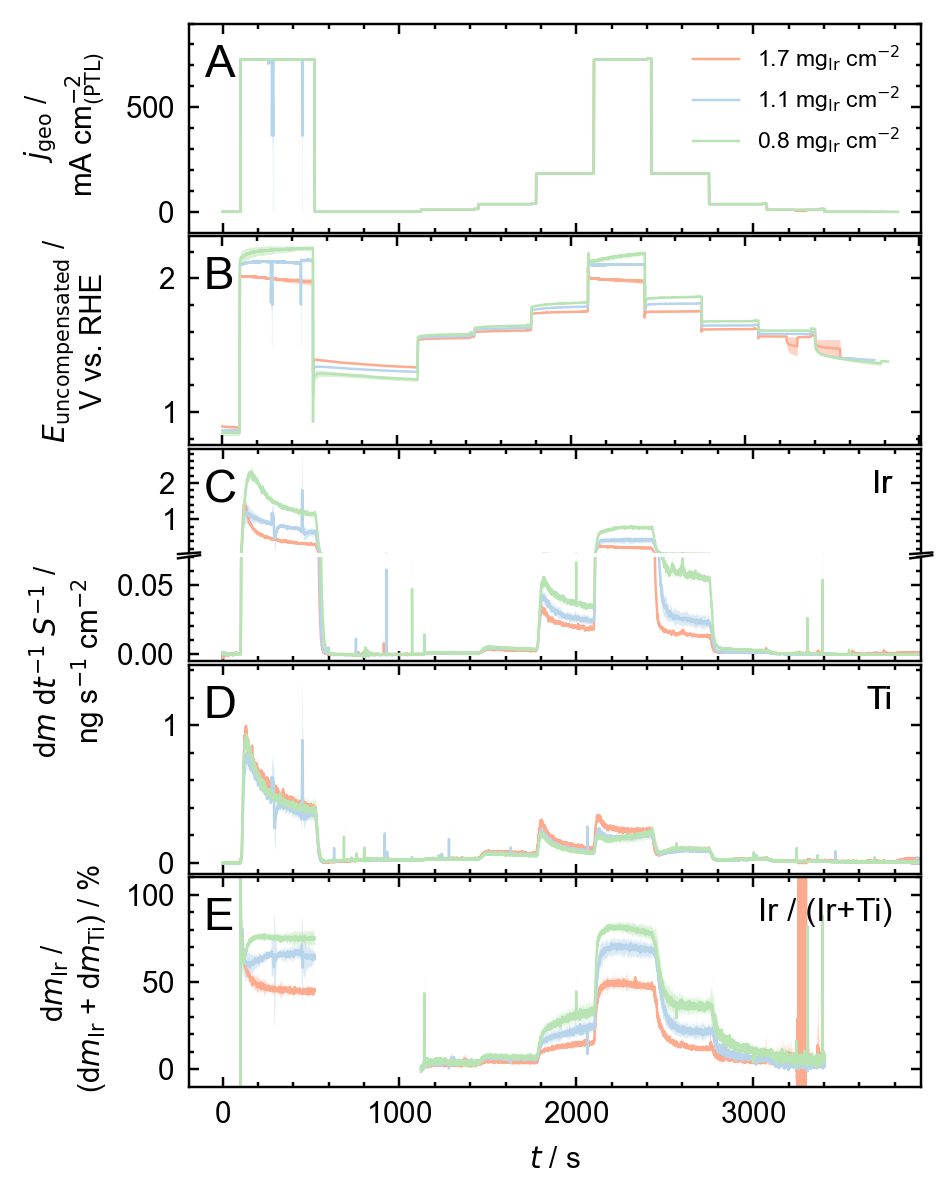

In [3]:
plot_name='sfig_dis_pro_top_all_loadings_Ir_Ti'
average_cols_icpms=['name_isotope_analyte', 'name_isotope_internalstandard', 'id_sample', 'icpms_location']  # 
average_cols_ec=['id_sample',]  # 
average_cols_both=['id_sample', 'icpms_location']
overlay_index_cols = ['id_spot',] 
overlay_cols=average_cols_both+overlay_index_cols
cols_ec_to_icpms=['loading__mg_Ir_cm2']


icpms_x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'
icpms_y_col = 'dm_dt_S__ng_s_cm2geo_fc_bottom_PTL'


exp_ec_overlay, data_ec_overlay, exp_icpms_overlay, data_icpms_overlay  \
        = db.overlay_exp_sfc_icpms(exp_ec, 
                                   data_ec, 
                                   exp_icpms,
                                   data_icpms,
                                   overlay_cols=overlay_cols,
                                   cols_ec_to_icpms=cols_ec_to_icpms
                                  )

## correct time sync for length of first technique (different for different MLs)
first_exp_ec_technique = exp_ec_overlay.groupby(overlay_cols).first()
time_diff_first_exp_ec_technique= first_exp_ec_technique.t_end__timestamp - first_exp_ec_technique.t_start__timestamp
time_correct_exp_ec = time_diff_first_exp_ec_technique - time_diff_first_exp_ec_technique.min()
time_correct_exp_ec.name='Timestamp_correction__timediff'
data_ec_overlay.loc[:, 'Timestamp_synchronized_corrected__s'] = data_ec_overlay.Timestamp_synchronized__s - data_ec_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds
data_icpms_overlay.loc[:, 't_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] = data_icpms_overlay.t_delaycorrected__timestamp_sfc_pc_synchronized__s - data_icpms_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds

## add column is_during_ocp
data_icpms_overlay.loc[:, 'is_during_ocp'] = data_icpms_overlay.id_exp_sfc.isin(exp_ec.loc[exp_ec.ec_name_technique == 'exp_ec_ocp', :].index)


## transform units
data_icpms_overlay.loc[:, 'dm_dt__pg_s'] = data_icpms_overlay.dm_dt__ng_s *1000

## new cols
data_icpms_overlay.loc[:, 'dm_dt_S__ng_s_mg_Ir_fc_bottom_PTL'] = data_icpms_overlay.dm_dt_S__ng_s_cm2geo_fc_bottom_PTL / exp_icpms_overlay.loading__mg_Ir_cm2


######
# Baseline correction for Iridium 
####
data_icpms_overlay, icpms_y_col_background, icpms_y_col_background_corrected\
            = general_funcs.background_correction(
                  icpms_x_col=icpms_x_col,
                  icpms_y_col=icpms_y_col,
                  data_icpms_overlay=data_icpms_overlay,
                  y_col_background='_background',
                  y_col_background_corrected='_background_corrected',
                  #debug=True,
                  )
# No background correction for Ti
data_icpms_overlay.loc[lambda row: row.index.get_level_values('name_isotope_analyte')=='Ti47', icpms_y_col_background_corrected] = data_icpms_overlay.loc[lambda row: row.index.get_level_values('name_isotope_analyte')=='Ti47', icpms_y_col] 
### baseline correction finished

data_icpms_overlay.loc[:, 'is_during_ocp_float']  = data_icpms_overlay.is_during_ocp.astype(float)


exp_ec_overlay_avg, data_ec_overlay_avg = plot.average(exp_ec_overlay,#a,# 
                                                        data_ec_overlay, 
                                                       on=average_cols_ec, #['id_sample'],#, 'icpms_location'],
                                                        overlay_index_cols=overlay_index_cols#[ 'id_spot', ],#['overlay'],
                                                       )

exp_icpms_overlay_avg, data_icpms_overlay_avg = plot.average(exp_icpms_overlay,#a,# 
                                                        data_icpms_overlay, 
                                                        on=average_cols_icpms,
                                                        overlay_index_cols=overlay_index_cols#[ 'id_spot', ],#'icpms_location'],#overlay_cols,#['overlay'],
                                                       )

# data stability rearrangements
averaged_cols = ['m_dissolved_trapz__ng']
data_stability.loc[:, 'icpms_location'] = data_stability.location
data_stability_avg = plot.aggregate_list_unique(data_stability, on=average_cols_icpms)\
                                    .drop(columns=averaged_cols)\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].mean()\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].min(), rsuffix='_min')\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].max(), rsuffix='_max')\
                                    .join(data_stability.groupby(average_cols_icpms)[averaged_cols].std(), rsuffix='_std')
                                         )
data_stability_avg.loc[:, 'm_dissolved_trapz__ng_round_significant'] = tools.round_significant_digits_df(data_stability_avg, 
                                                                                                             col_value = 'm_dissolved_trapz__ng',
                                                                                                             col_error = 'm_dissolved_trapz__ng_std', 
                                                                                                             return_type='str'
                                                                                                            )
exp_icpms_overlay_avg.loc[:, 'm_dissolved_trapz__ng_round_significant'] = data_stability_avg.loc[:, 'm_dissolved_trapz__ng_round_significant']


# Ir_Ti ratio 
data_icpms_overlay_avg_Ir_Ti = data_icpms_overlay_avg.loc[['Ir193', ], :].reset_index().set_index(['id_sample', 'icpms_location', 'id_data_overlay'])\
                                          .join(data_icpms_overlay_avg.loc[['Ti47', ], :].reset_index().set_index(['id_sample','icpms_location', 'id_data_overlay']),
                                                                                                        lsuffix='_Ir',
                                                                                                        rsuffix='_Ti',
                                                                                                       )
exp_icpms_overlay_avg_Ir_Ti = plot.aggregate_list_unique(exp_icpms_overlay_avg, on=['id_sample', 'icpms_location'])





data_icpms_overlay_avg_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent'] = \
            ((data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_Ir'] ) 
             / (data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_Ir'] + data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_Ti'] ))\
            *100
data_icpms_overlay_avg_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent_max'] = \
            ((data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_Ir'] ) 
             / (data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_Ir'] + data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_Ti'] ))\
            *100
data_icpms_overlay_avg_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent_min'] = \
            ((data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_Ir'] ) 
             / (data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_Ir'] + data_icpms_overlay_avg_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_Ti'] ))\
            *100


plot.manual_col_to_axis_label['t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] = '$t$ / s'
plot.manual_col_to_axis_label['dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_background_corrected'] = 'd$m$ d$t^{-1}$ $S^{-1}$ /\nng s$^{-1}$ cm$^{-2}$'
plot.manual_col_to_axis_label['E_WE_uncompensated__VvsRHE'] = '$E_{\\mathrm{uncompensated}}$ /\nV vs. RHE'



with plt.rc_context(plot.get_style(style='singleColumn',
                                  increase_fig_height=2,
                                   add_margins= {'left': 0.6,},
                                  interactive =True,)):
    plot_storage = plot.PlotDataStorage(plot_name, overwrite_existing=True)

    fig = plt.figure()
    height_ratios=[1,1,.5,.5,1,1]
    gs = gridspec.GridSpec(6, 1, height_ratios=height_ratios)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1_potential = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[2, 0], sharex=ax1)
    ax_Ir_top_inset = fig.add_subplot(gs[3, 0], sharex=ax1)
    ax2_upper_lower = plot.add_empty_subplot(fig, gs[2:4, 0])
    ax4 = fig.add_subplot(gs[4, 0], sharex=ax1)
    
    ax_Ir_Ti_ratio = fig.add_subplot(gs[5, 0], sharex=ax1)
    
    axs = [ax1,ax1_potential, ax2_upper_lower,ax4, ax_Ir_Ti_ratio]

    #Hide xaxis label on ax
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    plot.combine_broken_axes(ax_top_left=ax2 ,
                ax_bottom_right=ax_Ir_top_inset,
                broken_ratio= height_ratios[2]/height_ratios[1],
                broken_axis='y',
               )


    ax3_4 = fig.add_subplot(gs[2:5, 0])
    ax3_4.patch.set_alpha(0)
    for spine in ['top', 'right', 'bottom', 'left']:
        ax3_4.spines[spine].set_visible(False)
    ax3_4.set_xticks([])
    ax3_4.set_yticks([])  


    overlay_cols=['id_sample', 'icpms_location']
    df_color = exp_ec_overlay.reset_index().loc[:, overlay_cols].drop_duplicates()

    df_color = df_color.dataset.add_column('color', 
                                            rowindexers=[                                                             
                                                        ((df_color.id_sample == 179) & (df_color.icpms_location == 'top')),
                                                        (df_color.id_sample == 180),
                                                         (df_color.id_sample == 181),
                                                        ],
                                            values=['Reds',
                                                    'Blues',
                                                    'Greens',
                                                   ], 
                                       cmap_min=0.3, cmap_max=0.7,)\
                                    .return_dataset()\
                                    .set_index(overlay_cols).loc[:, ['color', ]]

    
    exp_ec_overlay_avg = exp_ec_overlay_avg\
                    .dataset\
                    .add_column('color',
                                rowindexers=[                                                             
                                            (exp_ec_overlay_avg.index.get_level_values('id_sample') == 179),
                                            (exp_ec_overlay_avg.index.get_level_values('id_sample') == 180),
                                             (exp_ec_overlay_avg.index.get_level_values('id_sample') == 181),
                                            ],
                                values=['Reds',
                                        'Blues',
                                        'Greens',
                                       ],
                                cmap_min=0.3, cmap_max=0.7, cmap_group='id_sample',
                                )\
                    .add_column('label', 
                                 values=exp_ec_overlay_avg.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x)).astype(str)+' mg$_{\mathrm{Ir}}$ cm$^{-2}$',
                                rowindexer_first_of_group='id_sample',
                                )\
                    .fill_between(x_col='Timestamp_synchronized_corrected__s',
                                  y_col='j__mA_cm2geo_fc_bottom_PTL'+'_min',
                                  y2_col='j__mA_cm2geo_fc_bottom_PTL'+'_max',
                                  data=data_ec_overlay_avg,
                                  ax=ax1,
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                                  axlabel_auto=False,
                             )\
                    .plot(x_col='Timestamp_synchronized_corrected__s',
                          y_col='j__mA_cm2geo_fc_bottom_PTL',
                          ax=ax1,
                          data=data_ec_overlay_avg,  
                          axlabel_auto=True,
                    ) \
                    .fill_between(x_col='Timestamp_synchronized_corrected__s',
                                  y_col='E_WE_uncompensated__VvsRHE'+'_min',
                                  y2_col='E_WE_uncompensated__VvsRHE'+'_max',
                                  data=data_ec_overlay_avg,
                                  ax=ax1_potential,
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                                  axlabel_auto=False,
                             )\
                    .plot(x_col='Timestamp_synchronized_corrected__s',
                         y_col='E_WE_uncompensated__VvsRHE',
                          ax=ax1_potential,
                         data=data_ec_overlay_avg,  
                          axlabel_auto=True,
                    ) \
     .return_dataset()


    exp_icpms_overlay_avg = exp_icpms_overlay_avg.join(df_color, on=overlay_cols)\
                    .dataset\
                    .add_column('label', 
                                         values=exp_icpms_overlay_avg.index.get_level_values('icpms_location'),
                                        rowindexer_first_of_group='icpms_location'
                                        )\
                     .add_column('ax_col', 
                                 rowindexers=[((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ti47')& (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                             ],
                                 values=[ax2, 
                                         ax4, 
                                        ])\
                         .add_column('ax_col_inset', 
                                     rowindexers=((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                     values=ax_Ir_top_inset, 
                                    )\
                    .return_dataset()
 
    for ax in ['ax_col', 'ax_col_inset']:
         # Mass flow for Ir and Ti
        exp_icpms_overlay_avg = exp_icpms_overlay_avg.dataset\
                        .fill_between(x_col=icpms_x_col,#'ghold_I_hold__A',#'n_product_of_interest_trapz__mol',
                                  y_col=icpms_y_col_background_corrected+'_min',#'S_number_trapz_min',#'n_dissolved_trapz__mol',
                              y2_col=icpms_y_col_background_corrected+'_max',#'S_number_trapz_max',
                                  data=data_icpms_overlay_avg,#.loc[data_stability_avg.scan_direction >= 1.5],
                                #sort_groups_by=[], --> alphabetical
                                ax=ax,  # 'ax_col',
                                  #marker='<',
                                          alpha=0.5,
                                  label='',
                                      linewidth=0,
                                      #linestyle='--',
                                      axlabel_auto=False,
                                 )\
                        .plot(x_col=icpms_x_col,
                             y_col=icpms_y_col_background_corrected,#'dm_dt_S__ng_s_cm2geo_fc_top_cell_Aideal',
                              ax=ax,  # 'ax_col',
                             data=data_icpms_overlay_avg,   
                             #marker='.',
                             # markersize=1,
                             # linestyle='',
                              axlabel_auto=False,
                        )\
                        .return_dataset()
    
    # remove data during ocp
    data_icpms_overlay_avg_Ir_Ti.loc[lambda row: row.is_during_ocp_float_Ir==1, 'dm_dt_Ir_to_total__percent'] = np.nan
    data_icpms_overlay_avg_Ir_Ti.loc[lambda row: row.is_during_ocp_float_Ir==1, 'dm_dt_Ir_to_total__percent_min'] = np.nan
    data_icpms_overlay_avg_Ir_Ti.loc[lambda row: row.is_during_ocp_float_Ir==1, 'dm_dt_Ir_to_total__percent_max'] = np.nan
    
    exp_icpms_overlay_avg_Ir_Ti.join(df_color, on=overlay_cols)\
                    .dataset\
                    .plot(x_col=icpms_x_col+'_Ir',
                         y_col='dm_dt_Ir_to_total__percent',
                          ax=ax_Ir_Ti_ratio,
                         data=data_icpms_overlay_avg_Ir_Ti, 
                          axlabel_auto=False,
                        )\
                    .fill_between(x_col=icpms_x_col+'_Ir',
                                  y_col='dm_dt_Ir_to_total__percent_min',
                                  y2_col='dm_dt_Ir_to_total__percent_max',
                                  ax=ax_Ir_Ti_ratio,
                                  data=data_icpms_overlay_avg_Ir_Ti,  
                                  alpha=0.5,
                                  axlabel_auto=False,
                                  linewidth=0,
                                 )
    
    
    # Annotation
    for index, row in exp_icpms_overlay_avg.reset_index().iterrows():
        print(row.ax_col)
        ax = row.ax_col if row.ax_col != ax2 else ax2_upper_lower
        ax.text(0.96, 0.9, 
                        row.name_isotope_analyte.strip('0123456789'), 
                        transform=ax.transAxes, 
                        ha='right', # this doesn't work properly for interactive plot rendering
                        va='top')

    ax_Ir_Ti_ratio.text(0.96, 0.9, 
            'Ir / (Ir+Ti)',
            transform=ax_Ir_Ti_ratio.transAxes, 
            ha='right', # this doesn't work properly for interactive plot rendering
            va='top') 
        
    # Plot labels
    plot_labels = list(string.ascii_uppercase)[:len(axs)]

    for ax, plot_label in zip(axs, plot_labels):
        ax.text(0.02, 0.9, plot_label, 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes,
                    fontsize=11)

    ax1_legend = ax1.legend(loc='upper right', fontsize=5.5)
    ax1_legend.get_frame().set_alpha(0) # alpha to invisible

    
    ax1.set_ylabel('$j_\mathrm{geo}$ /\n mA cm$_{(\mathrm{PTL})}^{-2}$')

    ax2.set_ylabel('')
    ax_Ir_top_inset.set_ylabel('')
    ax4.set_ylabel('')
    ax3_4.set_ylabel(plot.get_axis_label(icpms_y_col_background_corrected))# 
    ax_Ir_Ti_ratio.set_ylabel('d$m_\mathrm{Ir}$ / \n (d$m_\mathrm{Ir}$ + d$m_\mathrm{Ti}$) / %')
    ax1.set_ylim([-100, 900])
    ax1.set_xlim([-190, 3950])
    ax_Ir_Ti_ratio.set_ylim([-10,110])
    
    ax2.set_ylim([.07, ax2.get_ylim()[1]])
    ax_Ir_top_inset.set_ylim([-.005, .07])
    
    for ax in axs[:-1]:
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), visible=False)
    axs[-1].set_xlabel('$t$ / s')


    fig.align_ylabels(axs + [ax3_4])
    plot_storage.export(fig, plot_format='pdf')
    plt.show()

